In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from palmerpenguins import load_penguins
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Silence!
import warnings
warnings.filterwarnings("ignore")

In [2]:
test = pd.read_csv("test_new.csv")

In [3]:
test

,PID,Lot Frontage,Lot Area,Street,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,...,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Gr Liv Area,Functional,Screen Porch,Pool Area,Yr Sold,Sale Type
0,907135180,60,8070,Pave,CollgCr,1Fam,1Story,4,5,1994,...,1,0,3,5,990,Typ,0,0,2007,WD
1,528181040,40,6792,Pave,NridgHt,TwnhsE,1Story,7,5,2005,...,2,0,2,6,1368,Typ,0,0,2006,New
2,528175010,44,6371,Pave,NridgHt,TwnhsE,1Story,7,5,2009,...,2,0,2,6,1358,Typ,0,0,2010,New
3,531379030,70,8304,Pave,SawyerW,1Fam,2Story,6,5,1997,...,2,1,3,7,1837,Typ,0,0,2006,WD
4,923275090,37,6951,Pave,Mitchel,1Fam,1Story,5,5,1984,...,1,0,3,5,923,Typ,0,0,2008,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,528174060,34,5381,Pave,NridgHt,Twnhs,1Story,6,5,2005,...,2,0,1,5,1306,Typ,0,0,2009,WD
601,903400180,64,13053,Pave,BrkSide,1Fam,1.5Fin,6,7,1923,...,1,1,4,8,1848,Typ,220,0,2008,WD
602,903227150,53,6360,Pave,BrkSide,1Fam,1.5Fin,5,6,1942,...,1,1,3,7,1453,Min2,148,0,2010,WD
603,909250070,43,7000,Pave,SWISU,1Fam,2Story,7,8,1926,...,1,0,3,6,1479,Typ,0,0,2006,WD


In [27]:
train = pd.read_csv("train_new.csv")

In [28]:
# Make a log(saleprice) column
train["LogSalePrice"] = np.log(train['SalePrice'])

In [29]:
train

,SalePrice,PID,Lot Frontage,Lot Area,Street,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,...,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Gr Liv Area,Functional,Screen Porch,Pool Area,Yr Sold,Sale Type,LogSalePrice
0,159000,531363010,80.0,9605,Pave,SawyerW,1Fam,1Story,7,6,...,1,3,6,1218,Typ,0,0,2009,WD,11.976659
1,271900,906203120,90.0,14684,Pave,SawyerW,1Fam,1Story,7,7,...,0,3,7,2196,Typ,0,0,2009,WD,12.513190
2,137500,916176030,NaN,14375,Pave,Timber,1Fam,SLvl,6,6,...,0,3,7,1344,Typ,233,0,2009,COD,11.831379
3,248500,528180130,48.0,6472,Pave,NridgHt,TwnhsE,1Story,9,5,...,0,2,6,1456,Typ,0,0,2009,WD,12.423198
4,167000,528290030,61.0,9734,Pave,Gilbert,1Fam,SLvl,7,5,...,1,3,7,1374,Typ,0,0,2009,WD,12.025749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,220000,906420020,80.0,10041,Pave,SawyerW,1Fam,2Story,8,5,...,1,3,8,1915,Typ,0,0,2006,WD,12.301383
2193,160000,909129090,70.0,6300,Pave,SWISU,1Fam,1.5Fin,5,4,...,1,3,7,1268,Typ,0,0,2009,WD,11.982929
2194,225000,528292060,41.0,12460,Pave,Gilbert,1Fam,2Story,7,5,...,1,4,8,2322,Typ,0,0,2008,WD,12.323856
2195,83000,905426060,85.0,10625,Pave,Edwards,1Fam,1Story,5,5,...,0,2,5,835,Typ,0,0,2010,COD,11.326596


In [30]:
train.columns

Index(['SalePrice', 'PID', 'Lot Frontage', 'Lot Area', 'Street',
       'Neighborhood', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Roof Style', 'Heating', 'Central Air',
       'Electrical', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'TotRms AbvGrd', 'Gr Liv Area', 'Functional', 'Screen Porch',
       'Pool Area', 'Yr Sold', 'Sale Type', 'LogSalePrice'],
      dtype='object')

In [31]:
y_train = train['SalePrice']
X_train = train.drop(['SalePrice','PID'],axis=1)

<Axes: title={'center': 'Missing Value Counts'}, ylabel='Frequency'>

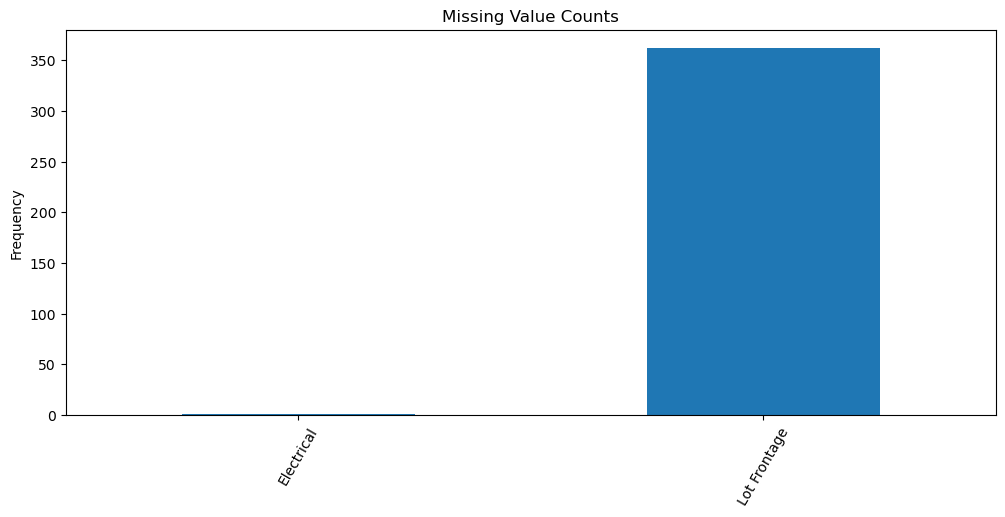

In [33]:
#Show features with at least some NaN values
null_counts = train.isnull().sum()
null_cols = []
##print("Percentage of null values in each column:\n")
for i in range(len(null_counts)):
    if null_counts[i] != 0:
        #print(null_counts.index[i], null_counts[i]/len(train))
        null_cols.append(null_counts.index[i])
# Plot missing values.
# Number of "NA" in each column.
na_series = train.isnull().sum().sort_values()
na_series[na_series.values >0].plot(kind='bar',figsize=(12,5), rot=60,ylabel = 'Frequency', 
               title = 'Missing Value Counts')

#Might consider dropping lot-frontage because it has like 20% missing

In [34]:
train[train['Electrical'].isna()]

,SalePrice,PID,Lot Frontage,Lot Area,Street,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,...,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Gr Liv Area,Functional,Screen Porch,Pool Area,Yr Sold,Sale Type,LogSalePrice
280,167500,916386080,73.0,9735,Pave,Timber,1Fam,SLvl,5,5,...,1,3,7,1394,Typ,0,0,2008,WD,12.028739


In [35]:
#Delete row 280
train = train.drop(index=280)
train

,SalePrice,PID,Lot Frontage,Lot Area,Street,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,...,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Gr Liv Area,Functional,Screen Porch,Pool Area,Yr Sold,Sale Type,LogSalePrice
0,159000,531363010,80.0,9605,Pave,SawyerW,1Fam,1Story,7,6,...,1,3,6,1218,Typ,0,0,2009,WD,11.976659
1,271900,906203120,90.0,14684,Pave,SawyerW,1Fam,1Story,7,7,...,0,3,7,2196,Typ,0,0,2009,WD,12.513190
2,137500,916176030,NaN,14375,Pave,Timber,1Fam,SLvl,6,6,...,0,3,7,1344,Typ,233,0,2009,COD,11.831379
3,248500,528180130,48.0,6472,Pave,NridgHt,TwnhsE,1Story,9,5,...,0,2,6,1456,Typ,0,0,2009,WD,12.423198
4,167000,528290030,61.0,9734,Pave,Gilbert,1Fam,SLvl,7,5,...,1,3,7,1374,Typ,0,0,2009,WD,12.025749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,220000,906420020,80.0,10041,Pave,SawyerW,1Fam,2Story,8,5,...,1,3,8,1915,Typ,0,0,2006,WD,12.301383
2193,160000,909129090,70.0,6300,Pave,SWISU,1Fam,1.5Fin,5,4,...,1,3,7,1268,Typ,0,0,2009,WD,11.982929
2194,225000,528292060,41.0,12460,Pave,Gilbert,1Fam,2Story,7,5,...,1,4,8,2322,Typ,0,0,2008,WD,12.323856
2195,83000,905426060,85.0,10625,Pave,Edwards,1Fam,1Story,5,5,...,0,2,5,835,Typ,0,0,2010,COD,11.326596


In [36]:
#Three approaches, drop lot, or drop rows, or fill in with 0s
train_row_drop = train.dropna()
train_lotless = train.drop(['Lot Frontage'],axis=1)
train_fill = train.fillna(value=0)
#Trying each below with different models and some polynomial terms

# Models

# Train_fill

In [37]:
X_train = train_fill.drop(['LogSalePrice','SalePrice','PID'],axis=1)
y_train = train_fill['LogSalePrice']


In [110]:
ct = ColumnTransformer(
  [
    ("dummify", #Dummifying variables that need it
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'), #If we haven't trained on a column, don't use for predicting on test validation
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

In [60]:
poly = PolynomialFeatures(degree=2, interaction_only = False,include_bias=False)

## Regression

In [59]:
from sklearn.linear_model import ElasticNet
pipe = Pipeline([
    ("preprocessing", ct),
    ("poly_terms",poly),
    ("model", LinearRegression())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 14307392260.036636
That model's value: {}


## ElasticNet

In [44]:
from sklearn.linear_model import ElasticNet
pipe = Pipeline([
    ("preprocessing", ct),
    ("model", ElasticNet())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.40994972747200026
That model's value: {}


## KNN

In [49]:
from sklearn.linear_model import ElasticNet
pipe = Pipeline([
    ("preprocessing", ct),
    ("model", KNeighborsRegressor())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.17997519923749217
That model's value: {}


In [64]:
from sklearn.linear_model import ElasticNet
pipe = Pipeline([
    ("preprocessing", ct),
    ("poly_terms",poly),
    ("model", KNeighborsRegressor())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.1863064540270806
That model's value: {}


## Decision Tree

In [51]:
from sklearn.linear_model import ElasticNet
pipe = Pipeline([
    ("preprocessing", ct),
    ("model", DecisionTreeRegressor())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.2048326381315384
That model's value: {}


In [63]:
from sklearn.linear_model import ElasticNet
pipe = Pipeline([
    ("preprocessing", ct),
    ("poly_terms",poly),
    ("model", DecisionTreeRegressor())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.20353378794421806
That model's value: {}


## GBR

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
pipe = Pipeline([
    ("preprocessing", ct),
    ("model", GradientBoostingRegressor())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.1449860810787839
That model's value: {}


In [62]:
from sklearn.ensemble import GradientBoostingRegressor
pipe = Pipeline([
    ("preprocessing", ct),
    ("poly_terms",poly),
    ("model", GradientBoostingRegressor())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.14562123520935819
That model's value: {}


## XGBoost

In [53]:
import xgboost as xgb
pipe = Pipeline([
    ("preprocessing", ct),
    ("model", xgb.XGBRegressor())
])
#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.14318243526193145
That model's value: {}


In [61]:
import xgboost as xgb
pipe = Pipeline([
    ("preprocessing", ct),
    ("poly_terms",poly),
    ("model", xgb.XGBRegressor())
])
#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.14775689900529027
That model's value: {}


# Train Drop Rows

In [88]:
X_train = train_row_drop.drop(['LogSalePrice','SalePrice','PID'],axis=1)
y_train = train_row_drop['LogSalePrice']

## ElasticNet

In [69]:
from sklearn.linear_model import ElasticNet
pipe = Pipeline([
    ("preprocessing", ct),
    ("model", ElasticNet())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.42432251874834603
That model's value: {}


## KNN

In [70]:
from sklearn.linear_model import ElasticNet
pipe = Pipeline([
    ("preprocessing", ct),
    ("model", KNeighborsRegressor())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.18181273014006008
That model's value: {}


In [71]:
from sklearn.linear_model import ElasticNet
pipe = Pipeline([
    ("preprocessing", ct),
    ("poly_terms",poly),
    ("model", KNeighborsRegressor())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.19055894844152962
That model's value: {}


## Decision Tree

In [72]:
from sklearn.linear_model import ElasticNet
pipe = Pipeline([
    ("preprocessing", ct),
    ("model", DecisionTreeRegressor())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.20484365418459846
That model's value: {}


In [73]:
from sklearn.linear_model import ElasticNet
pipe = Pipeline([
    ("preprocessing", ct),
    ("poly_terms",poly),
    ("model", DecisionTreeRegressor())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.20781592607631105
That model's value: {}


## GBR

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
pipe = Pipeline([
    ("preprocessing", ct),
    ("model", GradientBoostingRegressor())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.1465306715059475
That model's value: {}


In [75]:
from sklearn.ensemble import GradientBoostingRegressor
pipe = Pipeline([
    ("preprocessing", ct),
    ("poly_terms",poly),
    ("model", GradientBoostingRegressor())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.15112792693950824
That model's value: {}


## XGBoost

In [94]:
import xgboost as xgb
pipe = Pipeline([
    ("preprocessing", ct),
    ("model", xgb.XGBRegressor())
])
#Grid search grid
grid = {
    'model__booster':['gbtree'],
    'model__learning_rate': [0.1, 0.2,.5],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [.5,.8],
    'model__colsample_bytree': [0.8, 1.0],
    'model__lambda': [1,2,.5],
    'model__alpha': [0,.2,.4],
}

#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.13728007194146433
That model's value: {'model__alpha': 0, 'model__booster': 'gbtree', 'model__colsample_bytree': 0.8, 'model__lambda': 1, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__subsample': 0.5}


In [93]:
import xgboost as xgb
pipe = Pipeline([
    ("preprocessing", ct),
    ("model", xgb.XGBRegressor())
])
#Grid search grid
grid = {
    'model__booster':['gblinear'],
    'model__lambda':[0,.1,.5,1,10],
    'model__alpha':[0,.25,.5,.75,1],
    'model__updater':['coord_descent'],
    'model__feature_selector':['cyclic','greedy'],
}


#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.14957963675436886
That model's value: {'model__alpha': 0, 'model__booster': 'gblinear', 'model__feature_selector': 'greedy', 'model__lambda': 0, 'model__updater': 'coord_descent'}


In [77]:
import xgboost as xgb
pipe = Pipeline([
    ("preprocessing", ct),
    ("poly_terms",poly),
    ("model", xgb.XGBRegressor())
])
#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.15633795174716653
That model's value: {}


# Train Drop Feature

In [78]:
X_train = train_lotless.drop(['LogSalePrice','SalePrice','PID'],axis=1)
y_train = train_lotless['LogSalePrice']

## ElasticNet

In [79]:
from sklearn.linear_model import ElasticNet
pipe = Pipeline([
    ("preprocessing", ct),
    ("model", ElasticNet())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.40994972747200026
That model's value: {}


## KNN

In [80]:
from sklearn.linear_model import ElasticNet
pipe = Pipeline([
    ("preprocessing", ct),
    ("model", KNeighborsRegressor())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.1797635443625188
That model's value: {}


In [81]:
from sklearn.linear_model import ElasticNet
pipe = Pipeline([
    ("preprocessing", ct),
    ("poly_terms",poly),
    ("model", KNeighborsRegressor())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.18729686995816905
That model's value: {}


## Decision Tree

In [82]:
from sklearn.linear_model import ElasticNet
pipe = Pipeline([
    ("preprocessing", ct),
    ("model", DecisionTreeRegressor())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.20563051059627746
That model's value: {}


In [83]:
from sklearn.linear_model import ElasticNet
pipe = Pipeline([
    ("preprocessing", ct),
    ("poly_terms",poly),
    ("model", DecisionTreeRegressor())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.20369686568532613
That model's value: {}


## GBR

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
pipe = Pipeline([
    ("preprocessing", ct),
    ("model", GradientBoostingRegressor())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.14471148358107616
That model's value: {}


In [85]:
from sklearn.ensemble import GradientBoostingRegressor
pipe = Pipeline([
    ("preprocessing", ct),
    ("poly_terms",poly),
    ("model", GradientBoostingRegressor())
])

#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.14531172285421662
That model's value: {}


## XGBoost

In [86]:
import xgboost as xgb
pipe = Pipeline([
    ("preprocessing", ct),
    ("model", xgb.XGBRegressor())
])
#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.14023294449659127
That model's value: {}


In [87]:
import xgboost as xgb
pipe = Pipeline([
    ("preprocessing", ct),
    ("poly_terms",poly),
    ("model", xgb.XGBRegressor())
])
#Grid search grid
grid = {'model__n_neighbors': list(range(2,10,2))}  # Values for n_neighbors to be tested
grid={}
#Grid search with cross validation
grid_search = GridSearchCV(pipe, grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

#Get best n and corresponding model score
best_n = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model Score:", -best_score)
print("That model's value:", best_n)

Best model Score: 0.14732179787658045
That model's value: {}


# Predictions

In [67]:
test
#No nan values so no early transforming

,PID,Lot Frontage,Lot Area,Street,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,...,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Gr Liv Area,Functional,Screen Porch,Pool Area,Yr Sold,Sale Type
0,907135180,60,8070,Pave,CollgCr,1Fam,1Story,4,5,1994,...,1,0,3,5,990,Typ,0,0,2007,WD
1,528181040,40,6792,Pave,NridgHt,TwnhsE,1Story,7,5,2005,...,2,0,2,6,1368,Typ,0,0,2006,New
2,528175010,44,6371,Pave,NridgHt,TwnhsE,1Story,7,5,2009,...,2,0,2,6,1358,Typ,0,0,2010,New
3,531379030,70,8304,Pave,SawyerW,1Fam,2Story,6,5,1997,...,2,1,3,7,1837,Typ,0,0,2006,WD
4,923275090,37,6951,Pave,Mitchel,1Fam,1Story,5,5,1984,...,1,0,3,5,923,Typ,0,0,2008,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,528174060,34,5381,Pave,NridgHt,Twnhs,1Story,6,5,2005,...,2,0,1,5,1306,Typ,0,0,2009,WD
601,903400180,64,13053,Pave,BrkSide,1Fam,1.5Fin,6,7,1923,...,1,1,4,8,1848,Typ,220,0,2008,WD
602,903227150,53,6360,Pave,BrkSide,1Fam,1.5Fin,5,6,1942,...,1,1,3,7,1453,Min2,148,0,2010,WD
603,909250070,43,7000,Pave,SWISU,1Fam,2Story,7,8,1926,...,1,0,3,6,1479,Typ,0,0,2006,WD


In [95]:
test['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [124]:
X_test = test.drop(['PID'],axis=1)

In [127]:
X_test.isna().sum().sum()

0

In [137]:
ct.set_output(transform=None)

ColumnTransformer(remainder='passthrough',
                  transformers=[('dummify',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000216823C8CD0>),
                                ('standardize', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002168239C550>)])

In [138]:
ct_fitted = ct.fit(X_train)

new_X_train = ct.transform(X_train)

model = ElasticNet()
model.fit(new_X_train,y_train)

ct_fitted = ct.fit(X_test)

new_X_test = ct.transform(X_test)
model.predict(new_X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- standardize__Overall Cond
- standardize__Overall Qual
Feature names seen at fit time, yet now missing:
- dummify__Electrical_Mix
- dummify__Functional_Sev
- dummify__Heating_Floor
- dummify__Heating_Grav
- dummify__Heating_OthW
- ...


In [125]:
pipe = Pipeline([
    ("preprocessing", ct),
    ("model", ElasticNet())
                               #alpha=0,lambda=1,colsample_bytree=.8,learning_rate=.1,max_depth=7,subsample=.5))
])
pipe.fit(X_train,y_train)
# Make predictions on the test set
y_pred = pipe.predict(X_test)

#make into dataframe with id_num
res = pd.DataFrame({'PID':test['PID'],'SalePrice':y_pred})
#turn into csv
#res.to_csv('house_price_.csv',index=False)
res

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
Best model Score: 0.13769917821391373
{'model__alpha': 0, 'model__booster': 'gbtree', 'model__colsample_bytree': 0.8, 'model__lambda': 1, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__subsample': 0.5}